In [1]:
import pandas as pd
import requests
from io import StringIO
import matplotlib.pyplot as plt

API_KEY = "iSAmhUl0PBcaNM1gNe1LWB2dZ6LTndq6"
QUERY_ID = 6111465
url = f"https://api.dune.com/api/v1/query/{QUERY_ID}/results/csv?limit=4000"

headers = {"X-Dune-API-Key": API_KEY}
response = requests.get(url, headers=headers)

df = pd.read_csv(StringIO(response.text))
df.head()


,day,avg_price,event
0,2025-11-01 00:00:00.000 UTC,3871.217977,<nil>
1,2025-10-31 00:00:00.000 UTC,3848.087500,<nil>
2,2025-10-30 00:00:00.000 UTC,3845.239375,<nil>
3,2025-10-29 00:00:00.000 UTC,3985.888715,<nil>
4,2025-10-28 00:00:00.000 UTC,4095.139792,<nil>


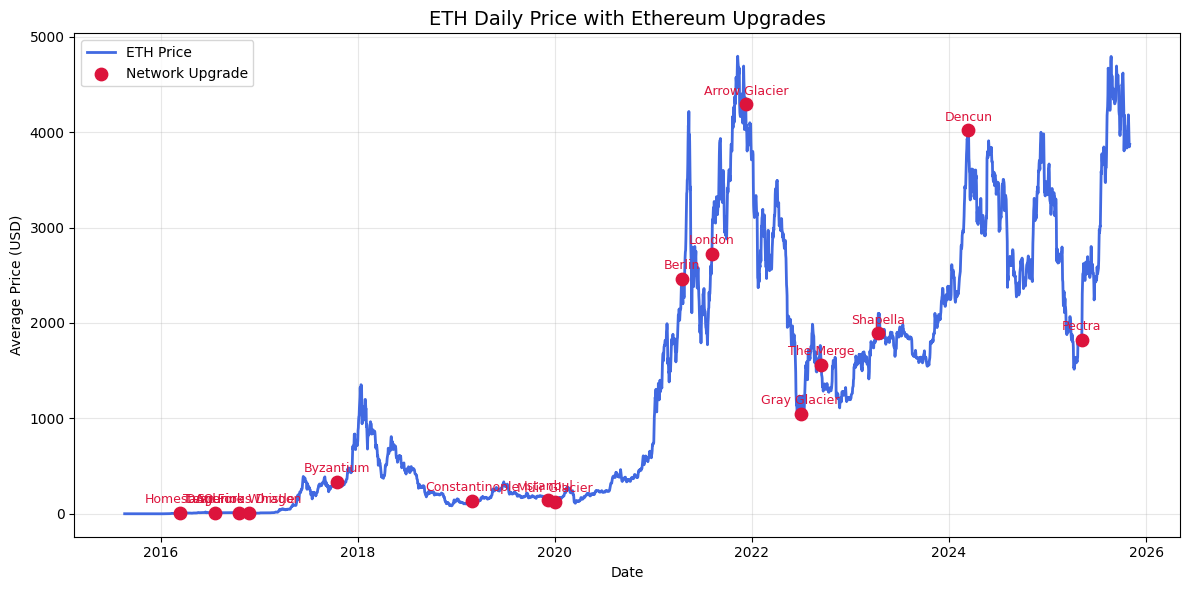

In [2]:

df['day'] = pd.to_datetime(df['day'])
upgrades = df[df['event'].notna() & (df['event'] != '<nil>')]
plt.figure(figsize=(12,6))
plt.plot(df['day'], df['avg_price'], label='ETH Price', color='royalblue', linewidth=2)
plt.scatter(upgrades['day'], upgrades['avg_price'], color='crimson', s=80, label='Network Upgrade', zorder=5)
for _, row in upgrades.iterrows():
    plt.text(row['day'], row['avg_price'] + 100, row['event'],
             color='crimson', fontsize=9, ha='center')
plt.title("ETH Daily Price with Ethereum Upgrades", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Average Price (USD)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
